## Summary and Conclusions

#### Model Quality:
I assess the model as correct. The obtained result is at the level of 0.65 (depending on the random selection of the test set). This means that the model can explain approximately 65% of the differences in house prices. Additionally, the RMSE error, which amounted to: $132,450.7. This means that the model makes an error of approximately this amount on average when estimating prices. The graph of actual versus predicted values shows that the points are arranged along the trend line, which is correct.

#### Usefulness:

The model correctly identified key factors affecting valuation. It turns out that the greatest impact on price is the area (area). The model can be used for preliminary estimation of house valuations based on their characteristics and parameters.

#### Limitations of the Applied Approach:
The main limitation is the use of linear regression, which assumes that the relationship between price and specific features is simple and linear. In reality, house or real estate prices may depend on more complex factors such as the prestige of the location, which this model is unable to capture 100%.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Statistics: 

Mean: 
price        476672.9
area            515.1
bedrooms          3.0
bathrooms         1.3
stories           1.8
parking           0.7


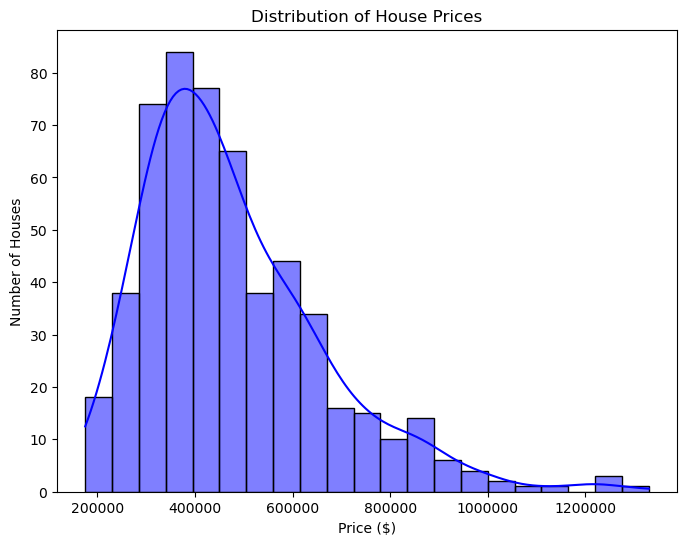


Scatter Plot - Price vs Area


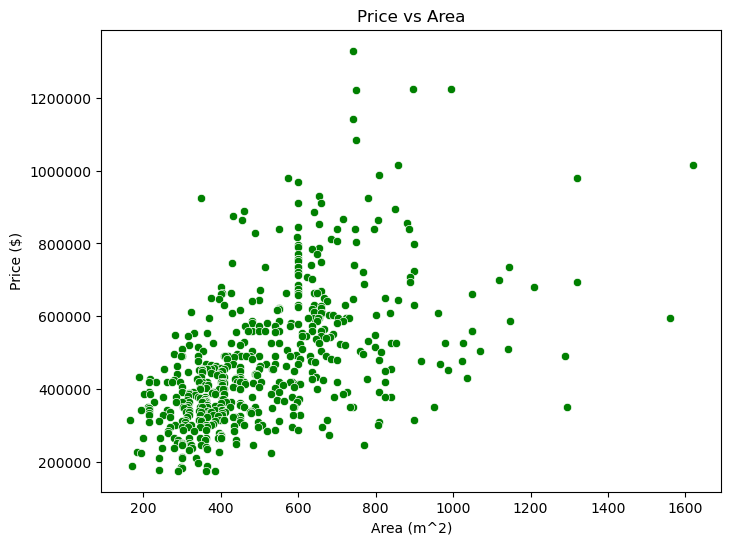


Correlation Heatmap


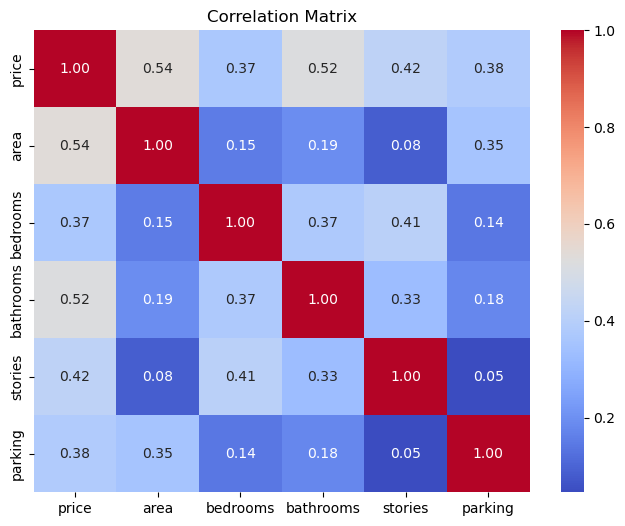

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')
df.head()
df.info()

df['price'] = df['price'] / 10
df['area'] = df['area'] / 10

print("\nStatistics: ")
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

print("\nMean: ")
print(df[numerical_cols].mean().round(1))

print("\nMedian: ")
print(df[numerical_cols].median().round(1))

print("\nStandard Deviation: ")
print(df[numerical_cols].std().round(1))

print("\nMissing Values: ")
missing_count = df.isnull().sum().sum()
print(f"Number of missing values in file: {missing_count}") 

print("\nData Visualization using various charts")
print("\nHistogram - Price Distribution")
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of House Prices")
plt.xlabel("Price ($)")
plt.ylabel("Number of Houses")
plt.show()

print("\nScatter Plot - Price vs Area")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df, color='green')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Price vs Area")
plt.xlabel("Area (m^2)")
plt.ylabel("Price ($)")
plt.show()

print("\nCorrelation Heatmap")
plt.figure(figsize=(8, 6))
df_numerical = df.select_dtypes(include=['number'])
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for i in binary_cols:
    df[i] = df[i].map({'yes': 1, 'no': 0})
    
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print(df.head(3))

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} houses")
print(f"Test set size: {X_test.shape[0]} houses")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  1330000.0  742.0         4          2        3         1          0   
1  1225000.0  896.0         4          4        4         1          0   
2  1225000.0  996.0         3          2        2         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                            False                         False  
2                             True                         False  

Training set size: 436 houses
Test set size: 109 houses


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("I chose linear regression because the goal is to predict a continuous numerical value,")
print("which in this case is price, and not assign to a specific category.")

I chose linear regression because the goal is to predict a continuous numerical value,
which in this case is price, and not assign to a specific category.


Average error in dollars (RMSE): 132450.7$
R2 score: 0.6529


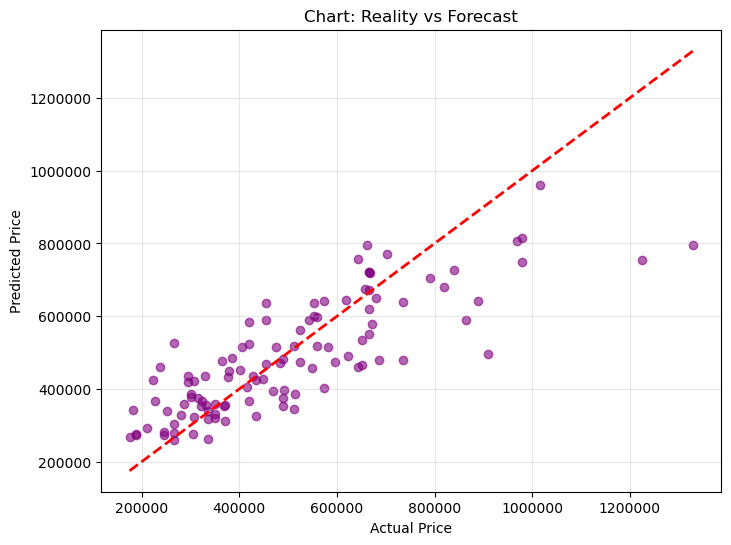

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Average error in dollars (RMSE): {round(rmse, 2)}$") 

r2 = r2_score(y_test, y_pred)
print(f"R2 score: {round(r2, 4)}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.ticklabel_format(style='plain')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Chart: Reality vs Forecast")
plt.grid(True, alpha=0.3)
plt.show()

## Summary and Conclusions

#### Model Quality:
I assess the model as correct. The obtained result is at the level of 0.65 (depending on the random selection of the test set). This means that the model can explain approximately 65% of the differences in house prices. Additionally, the RMSE error, which amounted to: $132,450.7. This means that the model makes an error of approximately this amount on average when estimating prices. The graph of actual versus predicted values shows that the points are arranged along the trend line, which is correct.

#### Usefulness:

The model correctly identified key factors affecting valuation. It turns out that the greatest impact on price is the area (area). The model can be used for preliminary estimation of house valuations based on their characteristics and parameters.

#### Limitations of the Applied Approach:
The main limitation is the use of linear regression, which assumes that the relationship between price and specific features is simple and linear. In reality, house or real estate prices may depend on more complex factors such as the prestige of the location, which this model is unable to capture 100%.